# Syed Shaf Shah

## FA22-BBD-039

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

In [3]:
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\creditcard (2).csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.shape

(284807, 31)

In [8]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [11]:
calss_values=df['Class'].value_counts()

<Axes: xlabel='Class', ylabel='count'>

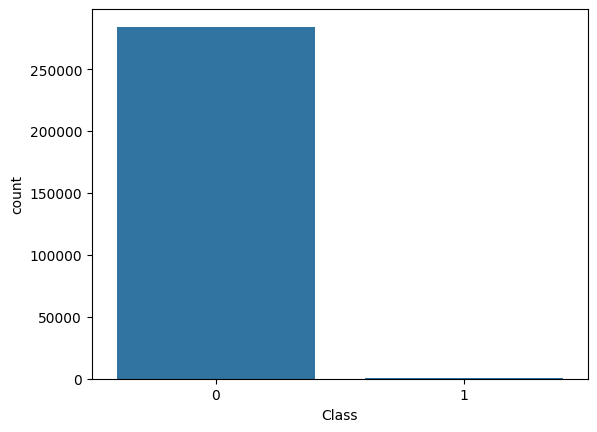

In [12]:
sns.barplot(calss_values)

<Axes: xlabel='Class', ylabel='Amount'>

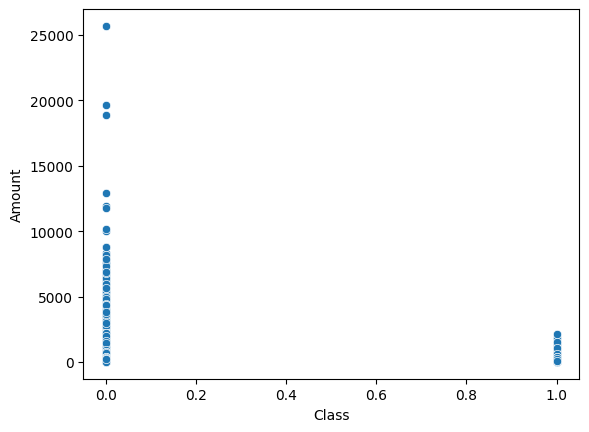

In [23]:
sns.scatterplot(x=df['Class'], y = df['Amount'])

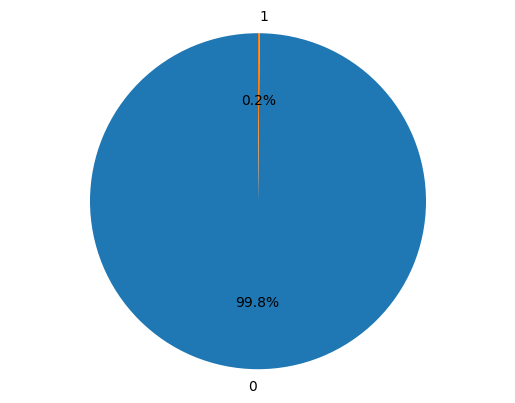

In [44]:
plt.pie(calss_values, labels=calss_values.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [13]:
x = df.drop(columns=['Class']) 
y = df['Class']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)

In [17]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [19]:
class ClassDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [20]:
train_dataset = ClassDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [38]:
class Classmodel(nn.Module):
    def __init__(self):
        super(Classmodel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(x_train.shape[1], 16),
            nn.ReLU(),
            nn.Linear(16, 1),       
            nn.Sigmoid()            
        )

    def forward(self, x):
        return self.net(x)


In [39]:
model = Classmodel()
criterion = nn.BCELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  

In [40]:

loss_values = []
accuracy_values = []

for epoch in range(10):
    model.train()  
    epoch_loss = 0

    
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)             
        loss = criterion(outputs, batch_y)  

        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()       

        epoch_loss += loss.item()  

   
    avg_loss = epoch_loss / len(train_loader)
    loss_values.append(avg_loss)  

    
    model.eval()
    with torch.no_grad():
        val_preds = model(x_test)
        val_predicted = (val_preds > 0.5).float()  
        val_accuracy = (val_predicted == y_test).sum() / y_test.shape[0]  
        accuracy_values.append(val_accuracy.item())  

    
    print(f'Epoch {epoch}, Loss: {avg_loss:.4f}, Accuracy: {val_accuracy.item():.4f}')

Epoch 0, Loss: 0.0223, Accuracy: 0.9994
Epoch 1, Loss: 0.0031, Accuracy: 0.9994
Epoch 2, Loss: 0.0028, Accuracy: 0.9993
Epoch 3, Loss: 0.0026, Accuracy: 0.9992
Epoch 4, Loss: 0.0025, Accuracy: 0.9993
Epoch 5, Loss: 0.0024, Accuracy: 0.9994
Epoch 6, Loss: 0.0024, Accuracy: 0.9994
Epoch 7, Loss: 0.0023, Accuracy: 0.9993
Epoch 8, Loss: 0.0023, Accuracy: 0.9993
Epoch 9, Loss: 0.0022, Accuracy: 0.9993


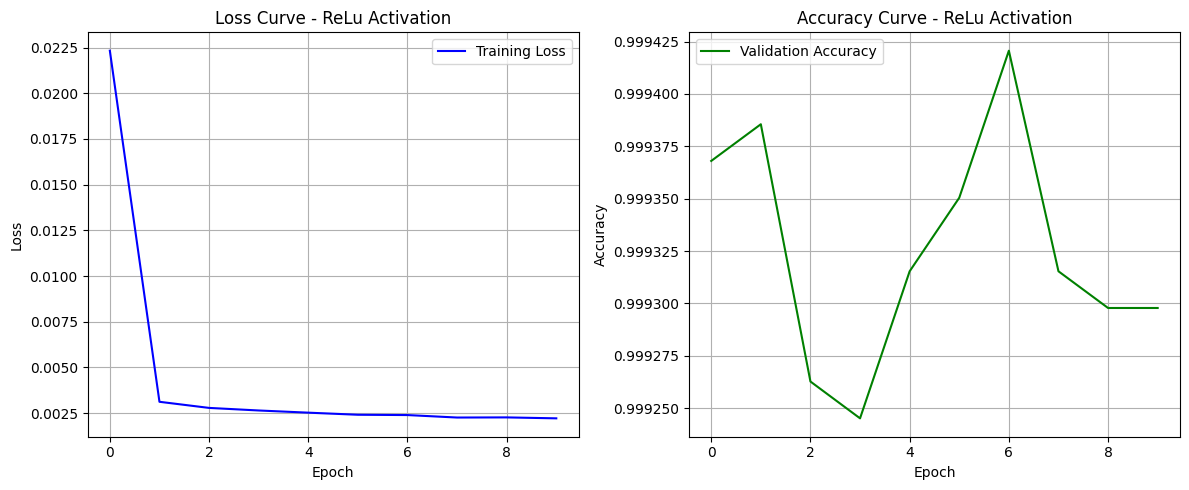

In [41]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Training Loss', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve - ReLu Activation")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Validation Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve - ReLu Activation")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
with torch.no_grad():
    preds = model(x_test)                     
    predicted = (preds > 0.5).float()        
    accuracy = (predicted == y_test).sum() / y_test.shape[0]  
    print(f'\nFinal Test Accuracy: {accuracy.item():.4f}')


Final Test Accuracy: 0.9993


In [46]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.87      0.69      0.77        98

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



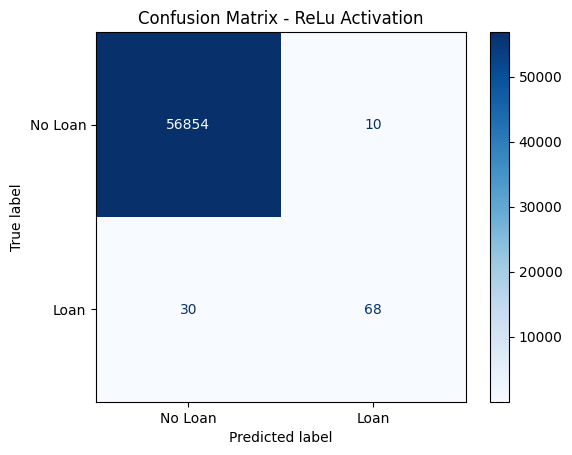

In [43]:
cm = confusion_matrix(y_test.numpy().astype(int), predicted.numpy().astype(int))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Loan", "Loan"])
disp.plot(cmap='Blues')  
plt.title("Confusion Matrix - ReLu Activation")
plt.show()